In [46]:
import pandas as pd
import numpy  as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [17]:
Datos = pd.read_csv('C:/Users/USUARIO/Desktop/Semestre 6/ANÁLISIS DE DATOS/Titanic-Dataset.csv')

In [8]:
Datos.shape

(891, 12)

In [9]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

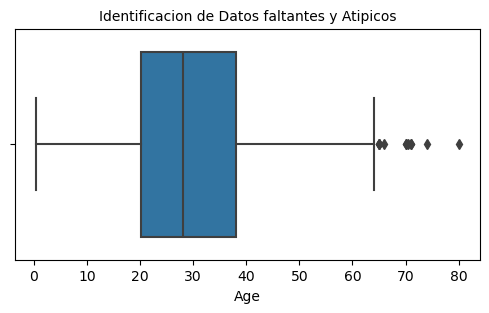

In [7]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

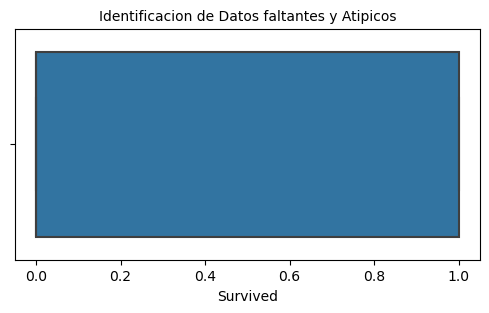

In [8]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Survived'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

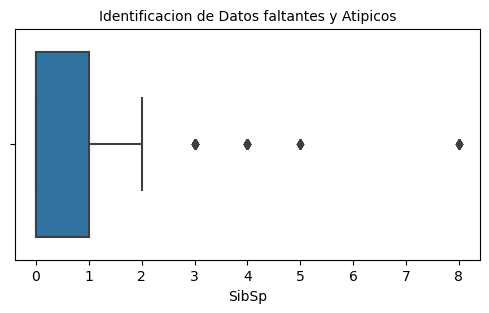

In [18]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

In [13]:
Datos.isnull().sum()*100/Datos.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
print("Cantidad de Registros con cero en Id pasajero:", Datos['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Sobrevivio:", Datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Clase:", Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Nombre:", Datos['Name'].isin([0]).sum())
print("Cantidad de Registros con cero en Sexo:", Datos['Sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad:", Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp:", Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch:", Datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Boleto:", Datos['Ticket'].isin([0]).sum())
print("Cantidad de Registros con cero en Tarifa:", Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Cabina:", Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en Embarcado:", Datos['Embarked'].isin([0]).sum())

Cantidad de Registros con cero en Id pasajero: 0
Cantidad de Registros con cero en Sobrevivio: 549
Cantidad de Registros con cero en Clase: 0
Cantidad de Registros con cero en Nombre: 0
Cantidad de Registros con cero en Sexo: 0
Cantidad de Registros con cero en Edad: 0
Cantidad de Registros con cero en SibSp: 608
Cantidad de Registros con cero en Parch: 678
Cantidad de Registros con cero en Boleto: 0
Cantidad de Registros con cero en Tarifa: 15
Cantidad de Registros con cero en Cabina: 0
Cantidad de Registros con cero en Embarcado: 0


In [ ]:
Datos['PassengerId']=Datos['PassengerId'].replace(0,Datos['PassengerId'].mean())
Datos['Survived']=Datos['Survived'].replace(0,Datos['Survived'].mean())
Datos['Pclass']=Datos['Pclass'].replace(0,Datos['Pclass'].mean())
Datos['Name']=Datos['Name'].replace(0,Datos['Name'].mean())
Datos['Sex']=Datos['Sex'].replace(0,Datos['Sex'].mean())
Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())
Datos['SibSp']=Datos['SibSp'].replace(0,Datos['SibSp'].mean())
Datos['Parch']=Datos['Parch'].replace(0,Datos['Parch'].mean())
Datos['Ticket']=Datos['Ticket'].replace(0,Datos['Ticket'].mean())
Datos['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())
Datos['Cabin']=Datos['Cabin'].replace(0,Datos['Cabin'].mean())
Datos['Embarked']=Datos['Embarked'].replace(0,Datos['Embarked'].mean())

In [17]:
# Reemplazar los valores '0' en 'Name', 'Ticket', 'Cabin' y 'Embarked' con la moda
moda_name = Datos['Name'].mode()[0]
Datos['Name'] = Datos['Name'].replace(0, moda_name)

moda_ticket = Datos['Ticket'].mode()[0]
Datos['Ticket'] = Datos['Ticket'].replace(0, moda_ticket)

moda_cabin = Datos['Cabin'].mode()[0]
Datos['Cabin'] = Datos['Cabin'].replace(0, moda_cabin)

moda_embarked = Datos['Embarked'].mode()[0]
Datos['Embarked'] = Datos['Embarked'].replace(0, moda_embarked)


Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

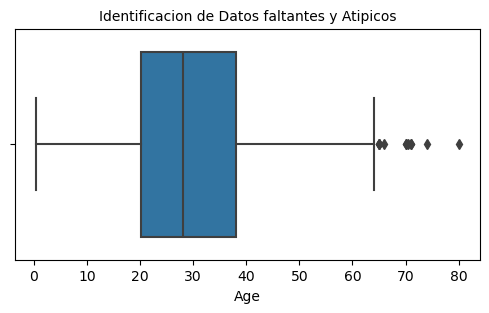

In [21]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

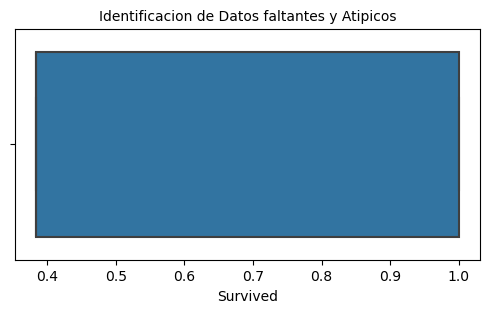

In [24]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Survived'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

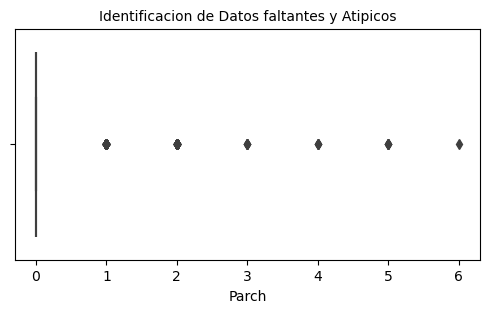

In [25]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Parch'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

In [21]:
#Conteo de datos atipicos
nivel_minimo=1
nivel_maximo=80
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print ("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 7


Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

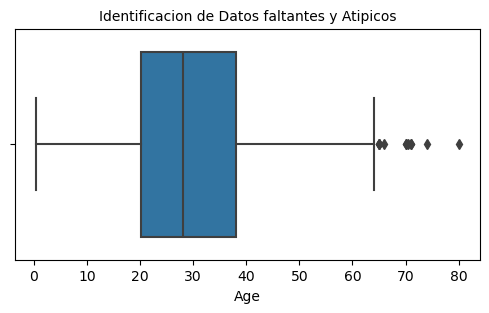

In [22]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

In [23]:
# Filtro para los datos atipicos 
Datos=Datos[(Datos['Age']<nivel_minimo)&(Datos['Age']>nivel_maximo)]
Datos=Datos[(Datos['Fare']<nivel_minimo)&(Datos['Fare']>nivel_maximo)]

In [24]:
# Valida si se eliminaron los datos atipicos
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print ("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [25]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  0 non-null      int64  
 1   Survived     0 non-null      int64  
 2   Pclass       0 non-null      int64  
 3   Name         0 non-null      object 
 4   Sex          0 non-null      object 
 5   Age          0 non-null      float64
 6   SibSp        0 non-null      int64  
 7   Parch        0 non-null      int64  
 8   Ticket       0 non-null      object 
 9   Fare         0 non-null      float64
 10  Cabin        0 non-null      object 
 11  Embarked     0 non-null      object 
dtypes: float64(2), int64(5), object(5)
memory usage: 0.0+ bytes


In [ ]:
# 3.

In [41]:
# Total de personas que sobrevivieron  
Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [42]:
Datos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [34]:
4 # Verificar las primeras filas del dataset
print(Datos.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [35]:
# Asegurarse de que no hay datos faltantes
print(Datos.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Rellenar datos faltantes 
Datos = Datos.fillna(Datos.mean())

In [ ]:
# Convertir columnas no numéricas a numéricas 
Datos['Sex'] = Datos['Sex'].map({'male': 0, 'female': 1})
Datos['Embarked'] = Datos['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [37]:
# Dividir el dataset en características (X) y etiqueta (Y)
X = Datos.drop('Survived', axis=1)
Y = Datos['Survived']

In [38]:
# Verificar las dimensiones de X y Y
print(X.shape)
print(Y.shape)


(891, 11)
(891,)


In [39]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)


In [40]:
# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(668, 11)
(223, 11)
(668,)
(223,)


In [43]:
print (X_train)

     PassengerId  Pclass                                               Name  \
671          672       1                             Davidson, Mr. Thornton   
417          418       2                      Silven, Miss. Lyyli Karoliina   
634          635       3                                 Skoog, Miss. Mabel   
323          324       2  Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...   
379          380       3                        Gustafsson, Mr. Karl Gideon   
..           ...     ...                                                ...   
131          132       3                     Coelho, Mr. Domingos Fernandeo   
490          491       3               Hagland, Mr. Konrad Mathias Reiersen   
528          529       3                          Salonen, Mr. Johan Werner   
48            49       3                                Samaan, Mr. Youssef   
80            81       3                               Waelens, Mr. Achille   

        Sex   Age  SibSp  Parch              Ticket

In [44]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


In [51]:
# 5 Entrenar el modelo de regresion Logistica


In [ ]:
# Convertir columnas categóricas a numéricas
Datos['Sex'] = Datos['Sex'].map({'male': 0, 'female': 1})
Datos['Embarked'] = Datos['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [49]:
# Rellenar datos faltantes
Datos = Datos.fillna(Datos.mean())

In [50]:
# Verificar que no queden datos no numéricos ni faltantes
print(Datos.dtypes)
print(Datos.isnull().sum())

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked       float64
dtype: object
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [53]:
# Dividir el dataset en características (X) y etiqueta (Y)
X = Datos.drop('Survived', axis=1)
Y = Datos['Survived']

In [54]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [55]:
# Entrenar el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train, Y_train)


LogisticRegression(solver='liblinear')

In [56]:
# Realizar predicciones
Prediccion = modelo_regresion.predict(X_test)

In [57]:
# Mostrar algunas predicciones
print(Prediccion)


[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


In [58]:
# 6 Evaluar desempeño del modelo
print(classification_report(Y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       137
           1       0.77      0.64      0.70        86

    accuracy                           0.79       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.79      0.78       223



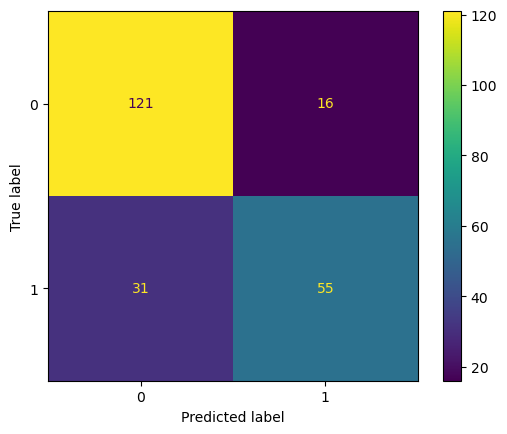

In [59]:
# 7 Realizar las diferentes graficas para ver los resultados del modelo 
# Matriz de confusion del modelo
cm = confusion_matrix(Y_test, Prediccion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

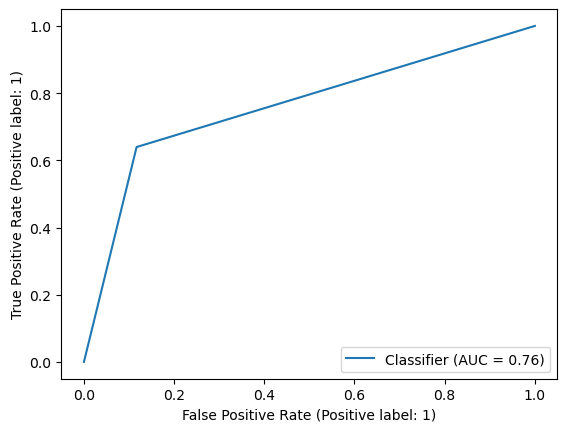

In [60]:
# Curva de precision del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test,Prediccion)
plt.show()